Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [4]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [6]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [7]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


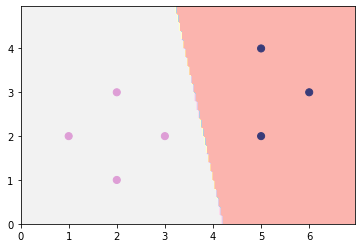

In [8]:
reg = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
pred = reg.predict(seven_X)
print(sklearn.metrics.accuracy_score(seven_y, pred))
plot_2d_clf_problem(seven_X, seven_y,reg.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

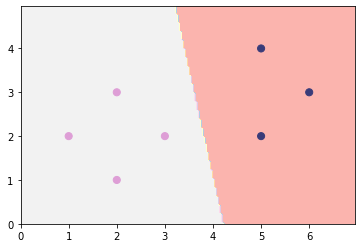

In [9]:
def linear(X, y):
    reg = LinearRegression().fit(X, y)
    pred = reg.predict(X)
    plot_2d_clf_problem(X, y,lambda x : reg.predict(x) >= 0.5)
linear(seven_X, seven_y)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [10]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


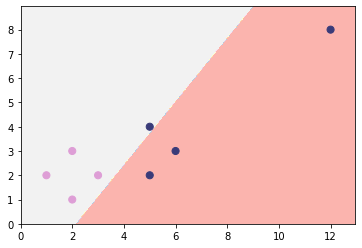

In [11]:
reg = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
pred = reg.predict(outlier_X)
print(sklearn.metrics.accuracy_score(outlier_y, pred))
plot_2d_clf_problem(outlier_X, outlier_y,reg.predict)
linear(outlier_X, outlier_y)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [12]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

In [13]:
reg = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
pred = reg.predict(unsep_X)
print(sklearn.metrics.accuracy_score(unsep_y, pred))
plot_2d_clf_problem(unsep_X, unsep_y,reg.predict)
linear(unsep_X, unsep_y)

0.875


**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3, n_redundant=0, n_clusters_per_class=1, n_features=2)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [15]:
y1 = [0 if i != 0 else 1 for i in y]
reg1 = LinearRegression().fit(X, y1)
#plot_2d_clf_problem(X, y1, lambda x : reg1.predict(x) >= 0.5)

y2 = [0 if i != 1 else 1 for i in y]
reg2 = LinearRegression().fit(X, y2)
#plot_2d_clf_problem(X, y2, lambda x : reg2.predict(x) >= 0.5)

y3 = [0 if i != 2 else 1 for i in y]
reg3 = LinearRegression().fit(X, y3)
#plot_2d_clf_problem(X, y3, lambda x : reg3.predict(x) >= 0.5)

def predict(reg1, reg2, reg3, X):
    pred1 = reg1.predict(X)
    pred2 = reg2.predict(X)
    pred3 = reg3.predict(X)
    arr = []
    cnt1, cnt2, cnt3 = [0 for i in range(len(pred1))], [0 for i in range(len(pred2))], [0 for i in range(len(pred3))]
    for i in range(len(pred1)):
        if pred1[i] >= 0.5: cnt1[i] += 1
    for i in range(len(pred2)):
        if pred2[i] >= 0.5: cnt2[i] += 1
    for i in range(len(pred3)):
        if pred3[i] >= 0.5: cnt3[i] += 1
    for i in zip(cnt1, cnt2, cnt3):
        if i[0] > i[1]:
            if i[0] > i[2]: arr.append(0)
            else: arr.append(2)
        else:
            if i[1] > i[2]: arr.append(1)
            else: arr.append(2)
    return arr
    
bla = predict(reg1, reg2, reg3, X)

reg = RidgeClassifier(alpha=0).fit(X, y)
#plot_2d_clf_problem(X, bla, reg.predict)
plot_2d_clf_problem(X, y, reg.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [16]:
def sigm(x, a):
    return 1/(math.exp(-a*x) + 1)
arr = []
for i in range(-10, 10):
    arr.append(sigm(i, 2))
plt.plot(arr)

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [17]:
from numpy import linalg

def lr_hw(x, w):
    xf = 0
    for i in range(len(w)):
        if i == 0:
            xf += w[0]
        else:
            xf += w[i]*x[i - 1]
    return 1/(1 + exp(-xf))

def cross_entropy_error(X,y,w):
    sum = 0
    for i in range(len(X)):
        sum += (- y[i]*log(lr_hw(X[i], w)) - (1 - y[i])*log(1 - lr_hw(X[i], w)))
    return sum/len(X)

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    w = [0 for i in range(len(X[0]) + 1)]
    wTrace = []
    error = 0
    for i in range(max_iter):
        w0 = 0
        diffw = [0 for i in range(len(X[0]))]
        for j in range(len(X)):
            h = lr_hw(X[j], w)
            w0 -= (h - y[j])
            for k in range(len(diffw)):
                diffw[k] -= (h - y[j])*X[j][k]
        w[0] += eta*w0
        for j in range(1, len(X[0]) + 1):
            w[j] = w[j]*(1 - alpha*eta) + eta*diffw[j - 1]
        wTrace.append(copy(w))
        cer = cross_entropy_error(X, y, w)
        if abs(cer - error) < epsilon:
            if trace:
                return np.array(w), wTrace
            else:
                return np.array(w)
        error = cer
    if trace:
        return np.array(w), wTrace
    else:
        return np.array(w)

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

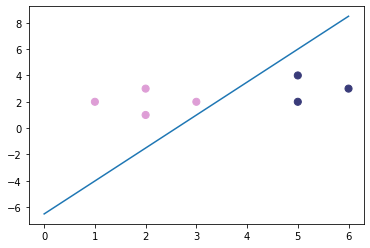

In [21]:
w, wTrace = lr_train(seven_X, seven_y, trace=True)
#print(w)
#arr = []
#y = [i for i in range(-5, 5)]
#for i in range(-5, 5):
#    arr.append(w[0] + w[1]*i + w[2]*i)
plt.scatter(seven_X[:,0],seven_X[:,1], c=seven_y, cmap=plt.cm.tab20b, marker='o', s=50);
#plt.plot(arr, y)

#cross_entropy_error(seven_X, seven_y, w)
x_values = [i for i in range(0, 7)]
y_values = - (w[0] + np.dot(w[1], x_values)) / w[2]

plt.plot(x_values, y_values, label='Decision Boundary')

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [118]:
from sklearn.metrics import zero_one_loss

In [124]:
arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
    pred = [0 if lr_hw(j, i) < 0.5 else 1 for j in seven_X]
    arr2.append(zero_one_loss(seven_y, pred))
f, xy = plt.subplots(2)
xy[0].plot(arr)
xy[0].plot(arr2)

arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, eta=0.005, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
xy[1].plot(arr)
    
arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, eta=0.01, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
xy[1].plot(arr)
    
arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, eta=0.05, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
xy[1].plot(arr)
    
arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, eta=0.1, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
xy[1].plot(arr)


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

[[-1.18244419 -0.30251926]]
[5.33129609]


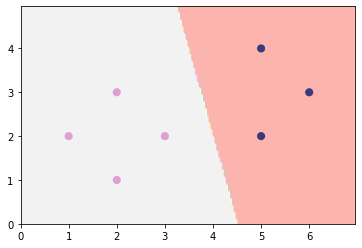

In [125]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(seven_X, seven_y)
print(reg.coef_)
print(reg.intercept_)
plot_2d_clf_problem(seven_X, seven_y, reg.predict)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

In [126]:
reg = LogisticRegression().fit(outlier_X, outlier_y)
print(reg.coef_)
print(reg.intercept_)
plot_2d_clf_problem(outlier_X, outlier_y, reg.predict)

[[-1.18249684 -0.30258673]]
[5.33162957]


**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

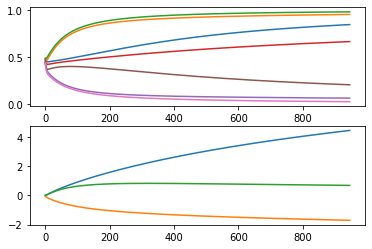

In [128]:
w, wTrace = lr_train(seven_X, seven_y, trace=True)
arr = []
for i in wTrace:
    arr2 = []
    for j in seven_X:
        arr2.append(lr_hw(j, i))
    arr.append(copy(arr2))
f, xy = plt.subplots(2)
xy[0].plot(arr)
xy[1].plot(wTrace)

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

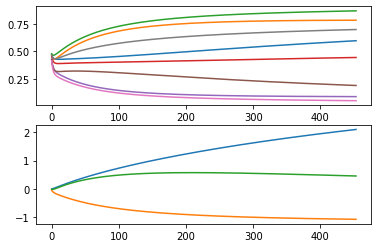

In [129]:
w, wTrace = lr_train(unsep_X, unsep_y, trace=True)
arr = []
for i in wTrace:
    arr2 = []
    for j in unsep_X:
        arr2.append(lr_hw(j, i))
    arr.append(copy(arr2))
f, xy = plt.subplots(2)
xy[0].plot(arr)
xy[1].plot(wTrace)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [130]:
from numpy.linalg import norm

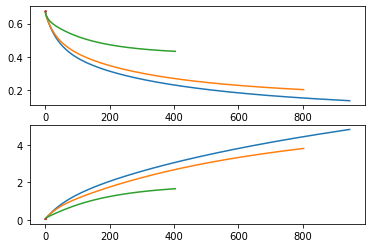

In [138]:
f, xy = plt.subplots(2)

arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
    arr2.append(norm(i))
xy[0].plot(arr)
xy[1].plot(arr2)

arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, alpha=1,trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
    arr2.append(norm(i))
xy[0].plot(arr)
xy[1].plot(arr2)

arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, alpha=10, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
    arr2.append(norm(i))
xy[0].plot(arr)
xy[1].plot(arr2)

arr = []
arr2 = []
w, wTrace = lr_train(seven_X, seven_y, alpha=100, trace=True)
for i in wTrace:
    arr.append(cross_entropy_error(seven_X, seven_y, i))
    arr2.append(norm(i))
xy[0].plot(arr)
xy[1].plot(arr2)

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [142]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

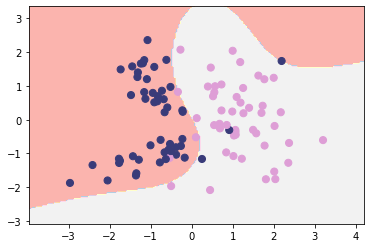

In [249]:
from sklearn.datasets import make_classification

X, y = make_classification(n_clusters_per_class=2, n_features=2, n_redundant=0)
poly = PolynomialFeatures(2)
fi = poly.fit_transform(X)
reg = LogisticRegression().fit(fi, y)
plot_2d_clf_problem(X, y, lambda x : reg.predict(poly.transform(x)))

poly = PolynomialFeatures(3)
fi = poly.fit_transform(X)
reg = LogisticRegression().fit(fi, y)
plot_2d_clf_problem(X, y, lambda x : reg.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?